### Initial cleansing and analysis


In this notebook we will take the whole Quotebank dataset and filter with a set of keywords : "gun violence, mass shooting, firearm-related violence, firearm violence". The actual process of filtering needed a lot of ressources so we ran it individually on the provided Google Colab after a few modifications for our purpose. We ran the data for a year each time. In this process, we added a new column to the dataframe, with the keyword found as a string in the "Keyword" column. Then we created a final dataframe (which is the one we will use) by filtering and concatenating only the rows with a value in this new column. 

In parallel, we used the gun shootings events datasets "mass_shootings" and "accidents" from "https://www.gunviolencearchive.org/" to create a new dataset of relevant events. We chose to keep data from 2015 to 2019 because the data for 2020 was not available. However this is not a problem because during early 2020 some other global events took over the press and forced a lockdown in the US, this may have biased our analysis during this time period.

##### Filtering quotations related to gun violence
We queried the entire quotebank dataset in search of quotes containing any of a set of key words relating to guns and gun violence. This was done in google colab to avoid having download the entire data sets onto our hard drive and to execute the code in chunks (by year) simultaneously on all our computers. We also printed a sample of the values, the shape and the number of missing values, both for the preprocessed and processed data.
The code for the year 2019 is shown below as an example :

The next step was to create the final dataframe by filtering out the rows which didn't contain a keyword. We also filtered out any quote with undetermined speaker ("None" in the data). Based on our observations of the data, it appears that quotes with no attributed speakers are in most cases unintelligible. Since our work will be based on a sentimental analysis, keeping those quotes seemed useless. This filtering was done with the following code, which we also previously ran on Google Collab:

In [ ]:
#Copy paste lorenzo's code

For the mass shootings dataset, we first loaded all the years from the website and merged them in a single one. 
As of now, we will keep all the data as our first wish is to see whether events actually have an effect on the amount of quotes. For further analysis, we might select a subset of the data to focus on particular events. See the code below for initial loading, concatening and analysis of the guns dataset.

In [16]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [17]:
DATA_FOLDER = ''

MASS_SHOOTINGS_15 = DATA_FOLDER+"massshootings15.csv"
MASS_SHOOTINGS_16 = DATA_FOLDER+"massshootings16.csv"
MASS_SHOOTINGS_17 = DATA_FOLDER+"massshootings17.csv"
MASS_SHOOTINGS_18 = DATA_FOLDER+"massshootings18.csv"
MASS_SHOOTINGS_19 = DATA_FOLDER+"massshootings19.csv"
ACCIDENTS = DATA_FOLDER+"accidents.csv"

In [18]:
mass_shootings_15 = pd.read_csv(MASS_SHOOTINGS_15)
mass_shootings_16 = pd.read_csv(MASS_SHOOTINGS_16)
mass_shootings_17 = pd.read_csv(MASS_SHOOTINGS_17)
mass_shootings_18 = pd.read_csv(MASS_SHOOTINGS_18)
mass_shootings_19 = pd.read_csv(MASS_SHOOTINGS_19)
accidents = pd.read_csv(ACCIDENTS)

In [19]:
mass_shootings=pd.concat([mass_shootings_15, mass_shootings_16, mass_shootings_17, mass_shootings_18,
                          mass_shootings_19], ignore_index=True)

In [20]:
mass_shootings = mass_shootings.drop(columns=['State', 'City Or County', 'Address', 'Operations'])
mass_shootings['Category']='Mass Shooting'
mass_shootings['Incident Date'] = pd.to_datetime(mass_shootings['Incident Date'])
accidents = accidents.drop(columns=['State', 'City Or County', 'Address', 'Operations'])
accidents = accidents[~accidents['Incident Date'].str.contains("2021")]
accidents = accidents[~accidents['Incident Date'].str.contains("2020")]
accidents['Category']='Accident'
accidents['Incident Date'] = pd.to_datetime(accidents['Incident Date'])

In [21]:
mass_shootings.sort_values('# Killed', ascending=False).head()

,Incident ID,Incident Date,# Killed,# Injured,Category
788,946496,2017-10-01,59,441,Mass Shooting
581,577157,2016-06-12,50,53,Mass Shooting
754,980577,2017-11-05,27,20,Mass Shooting
1574,1466705,2019-08-03,23,23,Mass Shooting
1372,1049217,2018-02-14,17,17,Mass Shooting


In [22]:
accidents.sort_values('# Killed', ascending=False).head()

,Incident ID,Incident Date,# Killed,# Injured,Category
1058,1564937,2019-12-05,4,1,Accident
1400,1323697,2019-02-09,2,0,Accident
1985,926038,2017-09-02,2,0,Accident
1825,1031159,2018-01-19,2,0,Accident
1445,1289271,2018-12-31,2,0,Accident


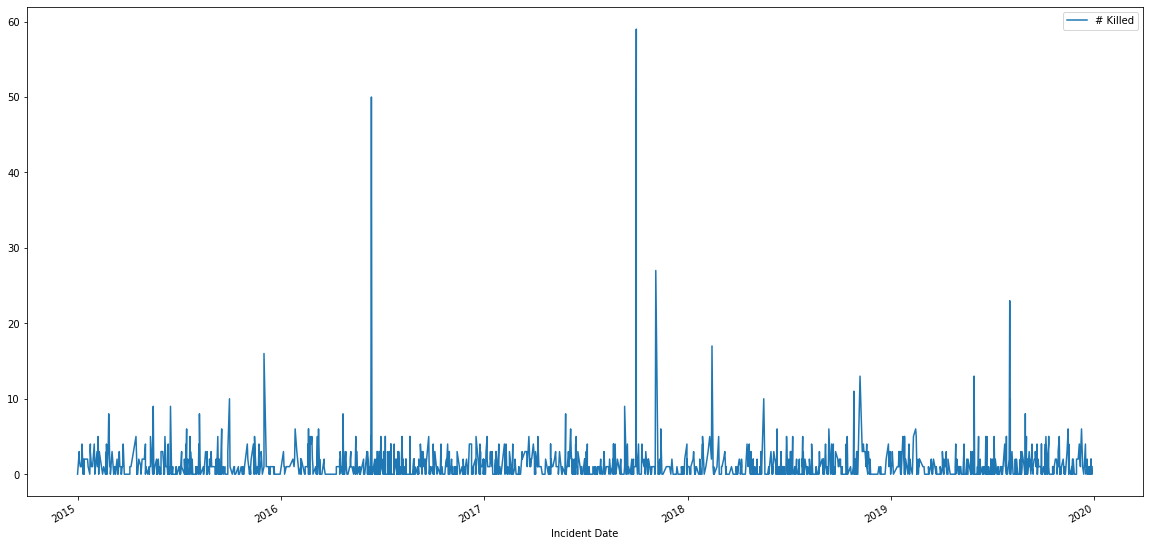

In [23]:
mass_shootings.plot(x='Incident Date', y='# Killed', figsize=(20,10));